In [4]:
import os
os.listdir("C:/Users/MURUGAVEL V/Jupyter Notebook/Fake_Curreny_Detection/Datasets")

['currency_dataset']

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "Datasets/currency_dataset/Train"
test_dir = "Datasets/currency_dataset/Test"

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Found 153 images belonging to 7 classes.
Found 42 images belonging to 7 classes.


In [6]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 112, 112, 32)      │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 112, 112, 32)      │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 112, 112, 32)      │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 112, 112, 32)      │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 112, 112, 32)      │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 112, 112, 32)      │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 112, 112, 16)      │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 112, 112, 16)      │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 112, 112, 96)      │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 112, 112, 96)      │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 112, 112, 96)      │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 113, 113, 96)      │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 56, 56, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2)

history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=50,
                    callbacks=[early_stop, lr_reduce])

Epoch 1/50


C:\Users\MURUGAVEL V\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.1430 - loss: -1.7551 - val_accuracy: 0.1429 - val_loss: -3.7448 - learning_rate: 1.0000e-04
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 381ms/step - accuracy: 0.1547 - loss: -4.5402 - val_accuracy: 0.1429 - val_loss: -6.6895 - learning_rate: 1.0000e-04
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 376ms/step - accuracy: 0.1422 - loss: -7.2259 - val_accuracy: 0.1429 - val_loss: -9.7006 - learning_rate: 1.0000e-04
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 392ms/step - accuracy: 0.1156 - loss: -10.8014 - val_accuracy: 0.1429 - val_loss: -12.9345 - learning_rate: 1.0000e-04
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 387ms/step - accuracy: 0.1388 - loss: -15.1178 - val_accuracy: 0.1429 - val_loss: -16.4228 - learning_rate: 1.0000e-04
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 382ms/step - accuracy: 0.1282 - loss: -18.5561 - val_accuracy: 0.1429 - val_loss: -20.1557 - learning_rate: 1.0000e-04
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 368ms/step - accuracy: 0.1425 - 

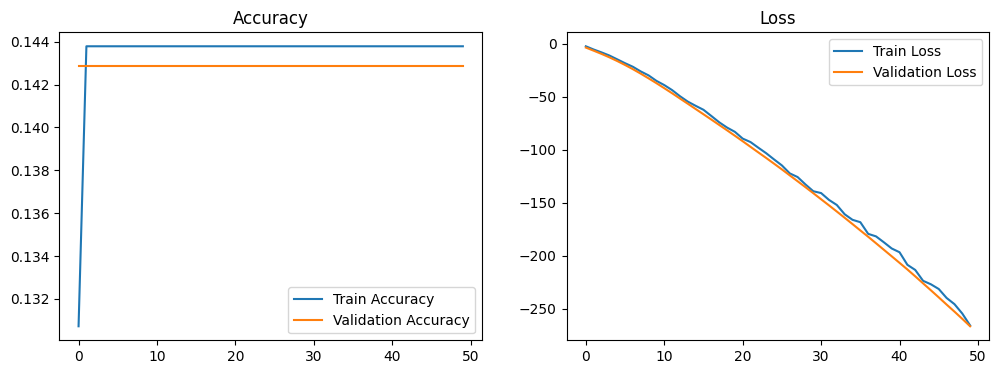

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()
plt.title("Loss")

plt.show()

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import os

# Path to your extracted folder
base_path = "Datasets/currency_dataset"  # or wherever you extracted the zip

# List all folders and files
for root, dirs, files in os.walk(base_path):
    print("Current folder:", root)
    print("Sub-folders:", dirs)
    print("Files:", files)
    print("-" * 40)


Current folder: Datasets/currency_dataset
Sub-folders: ['Test', 'Train']
Files: []
----------------------------------------
Current folder: Datasets/currency_dataset\Test
Sub-folders: ['1Hundrednote', '2Hundrednote', '2Thousandnote', '5Hundrednote', 'Fiftynote', 'Tennote', 'Twentynote']
Files: []
----------------------------------------
Current folder: Datasets/currency_dataset\Test\1Hundrednote
Sub-folders: []
Files: ['1.jpg', '14.jpg', '15.jpg', '16.jpg', '2.jpg', '3.jpg']
----------------------------------------
Current folder: Datasets/currency_dataset\Test\2Hundrednote
Sub-folders: []
Files: ['1.jpg', '2.jpg', '3.jpg', '31.jpg', '32.jpg', '33.jpg']
----------------------------------------
Current folder: Datasets/currency_dataset\Test\2Thousandnote
Sub-folders: []
Files: ['1.jpg', '2.jpg', '3.jpg', '31.jpg', '32.jpg', '33.jpg']
----------------------------------------
Current folder: Datasets/currency_dataset\Test\5Hundrednote
Sub-folders: []
Files: ['1.jpg', '2.jpg', '3.jpg', '31

Found 153 files belonging to 7 classes.
Using 123 files for training.
Found 42 files belonging to 7 classes.
Using 8 files for validation.
Class names: ['1Hundrednote', '2Hundrednote', '2Thousandnote', '5Hundrednote', 'Fiftynote', 'Tennote', 'Twentynote']


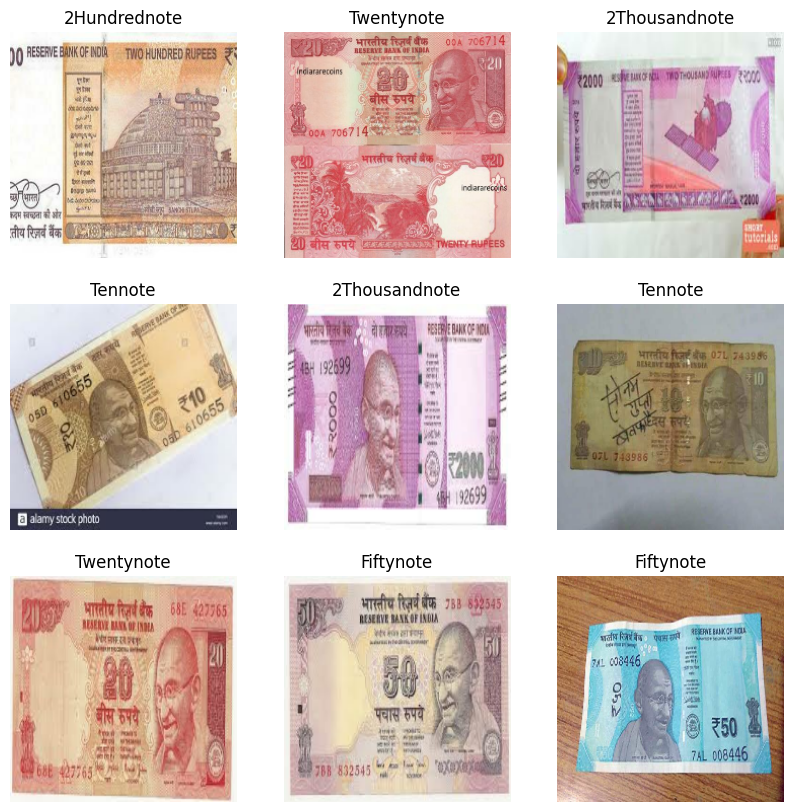

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Path to your extracted dataset
dataset_path = "Datasets/currency_dataset"  # Path where your dataset is stored

# Image size and batch size
img_size = (224, 224)  # Resize all images to 224x224
batch_size = 32  # Number of images per batch

# Load and preprocess data
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(dataset_path, 'Train'),  # Loading images from 'Train' folder
    validation_split=0.2,  # Split data into training and validation
    subset="training",  # Use this for training
    seed=42,  # For reproducibility
    image_size=img_size,  # Resize images
    batch_size=batch_size  # Set batch size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(dataset_path, 'Test'),  # Loading images from 'Test' folder
    validation_split=0.2,  # Split data into training and validation
    subset="validation",  # Use this for validation
    seed=42,  # For reproducibility
    image_size=img_size,  # Resize images
    batch_size=batch_size  # Set batch size
)

# Optimize performance by caching, shuffling, and prefetching the data
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

import os

# Get the class names based on folder names in the 'Train' directory
class_names = os.listdir(os.path.join(dataset_path, 'Train'))

# Print class names
print("Class names:", class_names)

# Display a few images to confirm
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [13]:
# Build the model
model = models.Sequential([
    # Input layer (Convolutional Layer)
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),  # Normalize pixel values

    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the output and add fully connected layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')  # Output layer (7 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summarize the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,863 (42.61 MB)

 Trainable params: 11,169,863 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training Before Augmentation

In [15]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15  # You can change the number of epochs as needed
)

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 382ms/step - accuracy: 0.1188 - loss: 5.7873 - val_accuracy: 0.1250 - val_loss: 2.0519
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 322ms/step - accuracy: 0.1394 - loss: 1.9555 - val_accuracy: 0.2500 - val_loss: 1.8615
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 322ms/step - accuracy: 0.2584 - loss: 1.8890 - val_accuracy: 0.1250 - val_loss: 1.9708
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step - accuracy: 0.2250 - loss: 1.8100 - val_accuracy: 0.1250 - val_loss: 1.8987
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 321ms/step - accuracy: 0.3907 - loss: 1.6323 - val_accuracy: 0.5000 - val_loss: 1.3728
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step - accuracy: 0.5376 - loss: 1.3141 - val_accuracy: 0.7500 - val_loss: 1.1076
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 303ms/step - accuracy: 0.6624 - loss: 0.9616 - val_accuracy: 0.5000 - val_loss: 0.8867
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 308ms/step - accuracy: 0.6767 - loss: 0.7314 - val_accuracy: 0.6250 - val_loss:

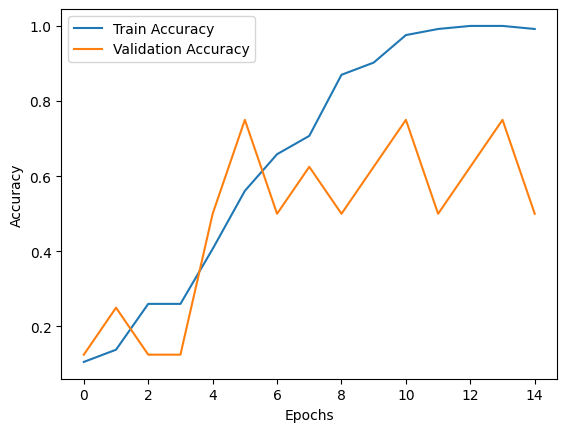

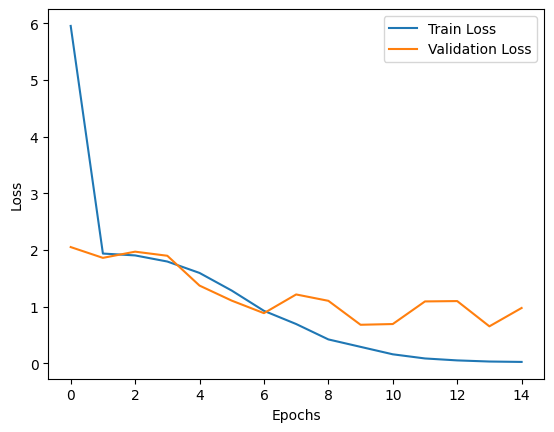

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Performing Augmentation

In [18]:
# Add Dropout layer
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(224, 224, 3)),  # Normalize pixel values
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout layer to reduce overfitting
    layers.Dense(len(class_names), activation='softmax')
])

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Reduce learning rate on plateau
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)

# Training with the callback
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=[lr_scheduler]
)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 373ms/step - accuracy: 0.1292 - loss: 3.2208 - val_accuracy: 0.3750 - val_loss: 1.9071 - learning_rate: 0.0010
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step - accuracy: 0.0946 - loss: 2.0135 - val_accuracy: 0.1250 - val_loss: 1.8931 - learning_rate: 0.0010
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - accuracy: 0.2522 - loss: 1.8331 - val_accuracy: 0.5000 - val_loss: 1.6859 - learning_rate: 0.0010
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step - accuracy: 0.3443 - loss: 1.7840 - val_accuracy: 0.1250 - val_loss: 1.7342 - learning_rate: 0.0010
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step - accuracy: 0.4289 - loss: 1.5119 - val_accuracy: 0.3750 - val_loss: 1.8821 - learning_rate: 0.0010
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - accuracy: 0.4519 - loss: 1.3654 - val_accuracy: 0.3750 - val_loss: 1.2796 - learning_rate: 5.0000e-04
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 305ms/step - accuracy: 0.6199 - loss: 1.0962 - val_accura

In [21]:
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [22]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [23]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)  # 10 classes in CIFAR-10
y_test = to_categorical(y_test, 10)

In [24]:
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Add the first convolutional layer with 32 filters, 3x3 kernel, ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Add a second convolutional layer with 64 filters, 3x3 kernel, ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Add a third convolutional layer with 64 filters, 3x3 kernel, ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output of the convolutional layers
model.add(layers.Flatten())

# Add a fully connected layer with 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Output layer with 10 units (one for each class) and softmax activation for multi-class classification
model.add(layers.Dense(10, activation='softmax'))


In [25]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.3320 - loss: 1.8241 - val_accuracy: 0.5210 - val_loss: 1.3260
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.5645 - loss: 1.2315 - val_accuracy: 0.6056 - val_loss: 1.1156
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.6292 - loss: 1.0578 - val_accuracy: 0.6445 - val_loss: 1.0182
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6677 - loss: 0.9476 - val_accuracy: 0.6605 - val_loss: 0.9753
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6948 - loss: 0.8760 - val_accuracy: 0.6673 - val_loss: 0.9603
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7235 - loss: 0.7952 - val_accuracy: 0.6993 - val_loss: 0.8659
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7393 - loss: 0.7464 - val_accuracy: 0.6889 - val_loss: 0.8912
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7522 - loss: 0.7032 - val_accuracy

In [27]:
 # Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6865 - loss: 2.4982
Test accuracy: 0.6854


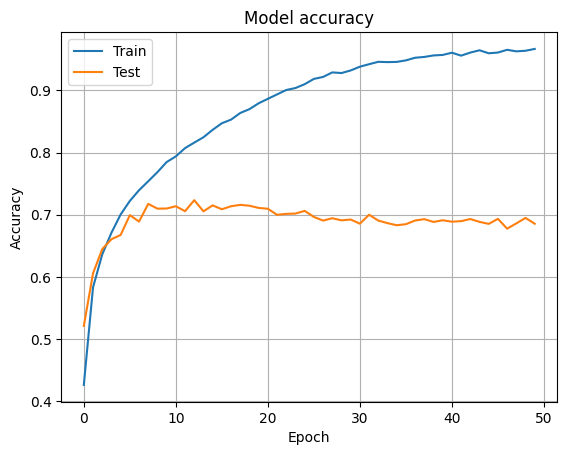

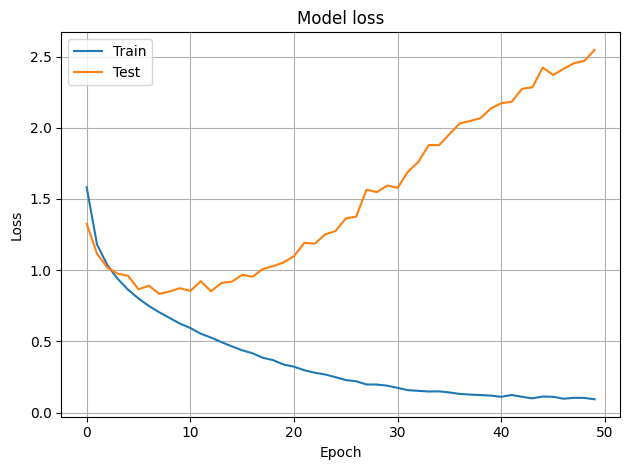

In [28]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

## Fine Tuning

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator on the training data
datagen.fit(x_train)

# Train the model using the augmented data
history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 38ms/step - accuracy: 0.4591 - loss: 1.8545 - val_accuracy: 0.6316 - val_loss: 1.0948
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5436 - loss: 1.3042 - val_accuracy: 0.6504 - val_loss: 1.0223
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.5710 - loss: 1.2166 - val_accuracy: 0.6621 - val_loss: 1.0070
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.5874 - loss: 1.1750 - val_accuracy: 0.6716 - val_loss: 0.9680
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6069 - loss: 1.1194 - val_accuracy: 0.6970 - val_loss: 0.8707
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6162 - loss: 1.0985 - val_accuracy: 0.6688 - val_loss: 0.9700
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.6241 - loss: 1.0724 - val_accuracy: 0.6996 - val_loss: 0.8817
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 35ms/step - accuracy: 0.6312 - loss: 1.0531 - 

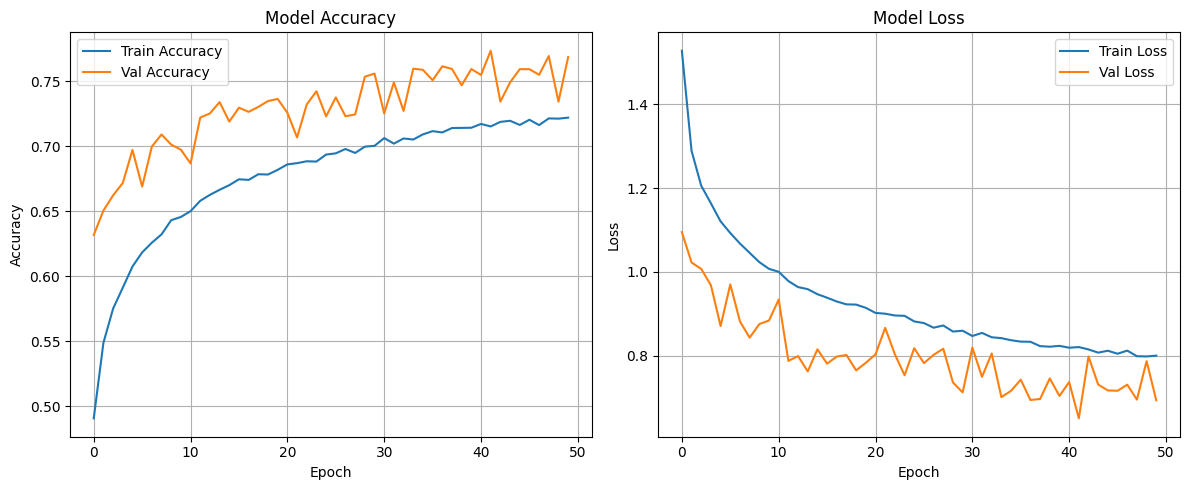

In [31]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Save the Model

In [33]:
model.save('resnet_cifar10_model.h5')

In [34]:
from tensorflow.keras.models import load_model

model = load_model('resnet_cifar10_model.h5')

In [35]:
from tensorflow.keras.datasets import cifar10

(_, _), (x_test, y_test) = cifar10.load_data()

# Normalize
x_test = x_test.astype('float32') / 255.0

In [36]:
from tensorflow.keras.utils import to_categorical

# Ensure y_test is one-hot encoded
y_test_categorical = to_categorical(y_test, num_classes=10)

# Check if model exists and is compiled
if model is None:
    print("Model is not defined or compiled!")
else:
    # Compile the model before evaluation (only if it's not compiled yet)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Evaluate the model with one-hot encoded y_test
    test_loss, test_acc = model.evaluate(x_test, y_test_categorical, verbose=2)

    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")

313/313 - 1s - 4ms/step - accuracy: 0.7684 - loss: 0.6934
Test Accuracy: 0.7684
Test Loss: 0.6934


## Classification Report

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


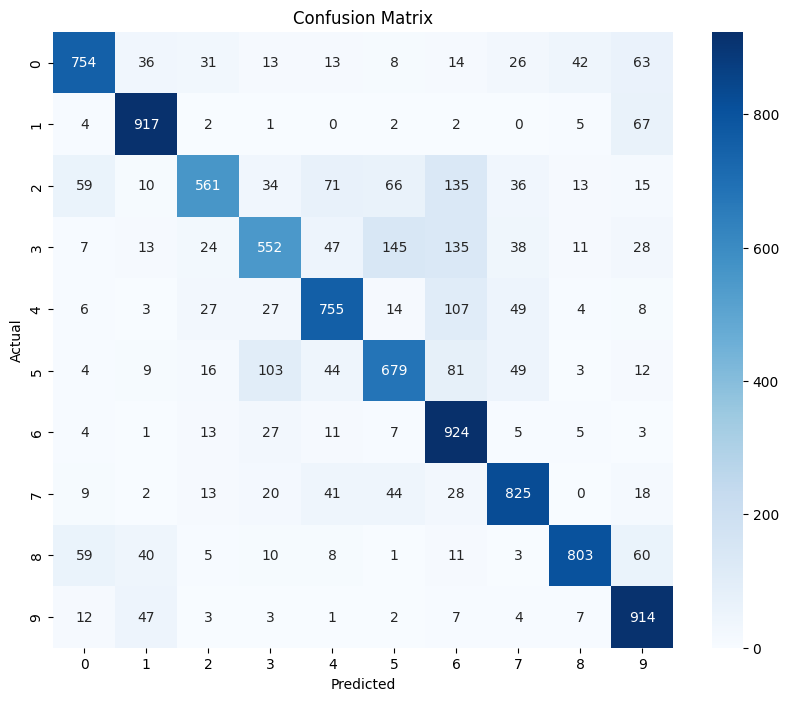

              precision    recall  f1-score   support

           0       0.82      0.75      0.79      1000
           1       0.85      0.92      0.88      1000
           2       0.81      0.56      0.66      1000
           3       0.70      0.55      0.62      1000
           4       0.76      0.76      0.76      1000
           5       0.70      0.68      0.69      1000
           6       0.64      0.92      0.76      1000
           7       0.80      0.82      0.81      1000
           8       0.90      0.80      0.85      1000
           9       0.77      0.91      0.84      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.76     10000
weighted avg       0.77      0.77      0.76     10000



In [38]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict classes
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = y_test.flatten()

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred))

## Model Accuracy

In [40]:
test_loss, test_acc = model.evaluate(x_test, y_test_categorical, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.7684 - loss: 0.6934
Test Accuracy: 0.7684
Test Loss: 0.6934
